# **Insurance in Healthcare analysis in the United States**
Spring 2025 Data Science Project

Group Members: Rushil Singhania, Anushk Pokharna, Virali Kataria

**Contributions**

-----------------------------------------------
**Rushil Singhania**

B: Dataset Curation and Preprocessing - Rushil further cleaned the dataset for our usecase and performed one-hot encoding.

C: Data Exploration and Summary Statistics - Rushil performed the statistical analysis on the data.

D: ML Algorithm Design/Development - Rushil gave helpful tips on how we can use Linear Regression and Random Forest Regression with the dataset and helped write the code.

F: Visualization, Result Analysis, Conclusion - Rushil wrote the result analysis comparing the results from the Random Forest Regression and Linear Regression.

H: Additional - Rushil provided very helpful insight in making sure both the ML models were correct.

-----------------------------------------------
**Anushk Pokharna**

A: Project idea - Anushk came up with the project topic.

B: Dataset Curation and Preprocessing - Anushk did the initial cleaning of the data.

D: ML Algorithm Design/Development - Anushk proposed using Random Forest Regression on the dataset.

E: ML Algorithm Training and Test Data Analysis - Anushk wrote the code for the Random Forest Regression on the dataset and trained it.

F: Visualization, Result Analysis, Conclusion - Anushk analyzed the result of the Random Forest Regression model, providing the necessary visuals.

G: Final Tutorial Report Creation - Anushk wrote the majority of the report.

-----------------------------------------------
**Virali Kataria**

A: Project idea - Virali helped come up with the questions once the topics had been selected.

B: Dataset Curation and Preprocessing - Virali found the dataset.

C: Data Exploration and Summary Statistics - Virali created the visualizations from the cleaned data.

D: ML Algorithm Design/Development - Virali proposed using Linear Regression on the dataset.

E: ML Algorithm Training and Test Data Analysis - Virali wrote the code for Linear Regression for the dataset and trained it.

F: Visualization, Result Analysis, Conclusion - Virali analyzed the result from the Linear regression model, providing the necessary visuals.

G: Final Tutorial Report Creation - Virali helped write and refine many parts of the report.




# Introduction

<img src="https://i0.wp.com/www.txhealthcare.com/wp-content/uploads/2022/09/health-insurance-featured-image.jpg?w=1280&ssl=1" width="500">





Healthcare costs are a mounting international concern, and insurance coverage is usually a high expense to individuals and households. From an insurer's standpoint, determining equal and proper premiums is not merely essential to profits but also as a way to design pricing systems that are equal and risk-driven. This has made predictive modeling a key tool in the insurance industry, where information is used to estimate the likely medical expenses a policyholder will incur. In this project, we look at this problem by creating a machine learning model that forecasts insurance charges from a set of individual-level variables.



The data set used in this project contains many important features commonly available at the time of insurance enrollment: age, gender, BMI (Body Mass Index), number of children, smoking status, region of residence, and the final insurance charges invoiced. All these variables play a specific part in arriving at medical risk and expected costs. For example, age and BMI are commonly associated with chronic disease, and smoking is a well-established risk factor for numerous conditions. Including demographic data such as region and sex allows us to capture probable geographic or system variations in healthcare expenditures.



The objective of this project is to take advantage of these features to create a predictive model that can efficiently approximate insurance charges for new individuals. By doing so, we are able to determine which of these factors are the causes of greater expenses and have a further understanding of the effect of lifestyle and demographics on health costs. This can be of use both in practice and academically: it raises our awareness of medical cost drivers, and it also offers possible applications in personalized pricing, healthcare policy making, and preventive health education.



This project involves various stages of the data science process — data exploration, cleaning, encoding categorical variables, building predictive models (e.g., Random Forest), and evaluating their performance. Along the way, we'll also explore feature importance to establish which inputs most significantly influence charges. The ultimate objective is not merely to construct a high-performance model, but also to find meaningful insights from the data that can potentially influence decision-making within a real insurance context.

Through analysis on this dataset we aim to answer the following questions:

*   Which features are most important when determining medical cost?

*   How accurately can we predict an individual's medical charges based on their smoking status?
*   Which regression model, linear regression vs. random forest regression, provides better predictive accuracy for medical charges?
*   Does incorporating multiple features improve predictive performance compared to using single features alone?  




# About Dataset
For this project will will be using the following dataset:

**Medical Cost Personal Datasets**

**Source:** Kaggle



**Link:** https://www.kaggle.com/datasets/mirichoi0218/insurance/data

**Description:**

The dataset provides a foundation for applying regression models to the insurance and healthcare sector. The data set includes demographic, behavioral, and geographic attributes of individual insurance beneficiaries and medical costs incurred by them. The data set includes the following columns:



age: Age of the primary insurance beneficiary (numeric).



sex: Sex of the insurance holder — male or female.



BMI: Body Mass Index, the normalized weight-to-height ratio. It is utilized to ascertain whether an individual is underweight, normal weight, overweight, or obese. The ideal range is typically considered between 18.5 and 24.9.



children: Number of dependents or children covered under the insurance policy.



smoker: Whether or not the person is a smoker — a key variable since it is known to affect health risk and medical expense.



region: Geographic region within the United States where the beneficiary resides. The four geographic regions included are "northeast", "southeast", "southwest", and "northwest".



charges: The actual medical charges incurred by the person through his or her health insurance company. This is the variable that we would like to predict in this project.



The data provides an even split between categorical and numerical features, which is perfect for application in predictive modeling activities. The inclusion of lifestyle indicators (e.g., smoking) alongside demographics and area data provides much scope for worthwhile analysis of the impact of individual and environmental factors on healthcare expenditure.


charges: The actual medical charges billed to the individual by their health insurance provider. This is the target variable that we aim to predict in this project.


The dataset provides a balanced mix of categorical and numerical features, making it well-suited for predictive modeling tasks. The inclusion of lifestyle factors (like smoking) alongside demographics and regional information allows for insightful exploration of how personal and environmental attributes influence healthcare costs.









In [87]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [88]:
# We import the dataset 'insurance.csv' into a pandas DataFrame and display it
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Dataset Preprocessing

Before building any machine learning model, it's important to properly preprocess the dataset. Raw data often contains issues like missing values, duplicate entries, inconsistent formatting, or categorical values that cannot be used directly by machine learning algorithms. Data preprocessing ensures that the dataset is clean, structured, and ready for accurate and meaningful analysis.

###Initial Data Inspection

We started by printing out the column names and checking the structure of the dataset. This step helped us confirm that all the variables — such as age, sex, BMI, children, smoker status, region, and charges — were present and  labeled.


In [89]:
# Now we look at the types of the columns and basic summary statistics in our dataset
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Missing Values and Duplicates

We checked the entire dataset for: Missing values using .isnull().sum()
and Duplicate rows using .duplicated().sum()


This is important because missing or repeated data can reduce our models performance. Luckily, the dataset had no missing values or duplicates, so no further imputation or removal was needed.


In [90]:
# We check for missing data in any of the columns, if there is missing data we will have to handle it
print(df.isnull().sum())
print("No missing data was found ")

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing data was found 


In [91]:
#Check for duplicate values in the dataset
print("duplicates= ", df.duplicated().sum())
df[df.duplicated()]

duplicates=  1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [92]:
# Since we have a duplicates value, we drop it
df = df.drop_duplicates()
print("duplicates= ", df.duplicated().sum())
print("Now there are no duplicated values")

duplicates=  0
Now there are no duplicated values


### Creating a BMI Category Column
To gain additional insights, we created a new column called bmi_level based on BMI values. This column categorizes individuals into:

Underweight,
Normal weight,
Overweight,
Obese,


This transformation allows us to analyze trends in charges with respect to general health groups rather than just raw BMI numbers.


In [93]:
# We create a new column bmi_level that describes the weight conditoin of the person, these categories make comparison easier
# as each category would have common characteristics and we can compare between categories
df['bmi_level'] = pd.cut(df['bmi'], bins=[-np.inf, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal weight ', 'Overweight', 'Obese category'])
df

<ipython-input-93-2d3a46f1c559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_level'] = pd.cut(df['bmi'], bins=[-np.inf, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal weight ', 'Overweight', 'Obese category'])


,age,sex,bmi,children,smoker,region,charges,bmi_level
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese category
2,28,male,33.000,3,no,southeast,4449.46200,Obese category
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese category
1334,18,female,31.920,0,no,northeast,2205.98080,Obese category
1335,18,female,36.850,0,no,southeast,1629.83350,Obese category
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


###Encoding Categorical Variables
Machine learning models typically require all input data to be numeric. To convert categorical variables into a usable form, we used pd.get_dummies() to perform one-hot encoding on the region column. This created separate binary columns for each region (e.g., region_northeast, region_southeast, etc.).

We also converted the smoker and sex column to binary manually: "yes"/"male" was mapped to 1 and "no"/"female" to 0.

These transformations ensure that the model can interpret categorical data meaningfully without introducing bias

In [94]:
# We do one-hot encoding by creating binary columns for each unique category of region. By converting it into individual columns
# data, we make it easier to work with the dataset, and then we display the dataset
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,bmi_level,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,Overweight,False,False,False,True
1,18,male,33.770,1,no,1725.55230,Obese category,False,False,True,False
2,28,male,33.000,3,no,4449.46200,Obese category,False,False,True,False
3,33,male,22.705,0,no,21984.47061,Normal weight,False,True,False,False
4,32,male,28.880,0,no,3866.85520,Overweight,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,Obese category,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,Obese category,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,Obese category,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,Overweight,False,False,False,True


In [95]:
df['Smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = df.drop('smoker', axis=1)
df

,age,sex,bmi,children,charges,bmi_level,region_northeast,region_northwest,region_southeast,region_southwest,Smoker
0,19,female,27.900,0,16884.92400,Overweight,False,False,False,True,1
1,18,male,33.770,1,1725.55230,Obese category,False,False,True,False,0
2,28,male,33.000,3,4449.46200,Obese category,False,False,True,False,0
3,33,male,22.705,0,21984.47061,Normal weight,False,True,False,False,0
4,32,male,28.880,0,3866.85520,Overweight,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,10600.54830,Obese category,False,True,False,False,0
1334,18,female,31.920,0,2205.98080,Obese category,True,False,False,False,0
1335,18,female,36.850,0,1629.83350,Obese category,False,False,True,False,0
1336,21,female,25.800,0,2007.94500,Overweight,False,False,False,True,0


In [96]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df

,age,sex,bmi,children,charges,bmi_level,region_northeast,region_northwest,region_southeast,region_southwest,Smoker
0,19,0,27.900,0,16884.92400,Overweight,False,False,False,True,1
1,18,1,33.770,1,1725.55230,Obese category,False,False,True,False,0
2,28,1,33.000,3,4449.46200,Obese category,False,False,True,False,0
3,33,1,22.705,0,21984.47061,Normal weight,False,True,False,False,0
4,32,1,28.880,0,3866.85520,Overweight,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,Obese category,False,True,False,False,0
1334,18,0,31.920,0,2205.98080,Obese category,True,False,False,False,0
1335,18,0,36.850,0,1629.83350,Obese category,False,False,True,False,0
1336,21,0,25.800,0,2007.94500,Overweight,False,False,False,True,0


In [97]:
print(df.isnull().sum())

age                 0
sex                 0
bmi                 0
children            0
charges             0
bmi_level           0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
Smoker              0
dtype: int64


#Data Exploration

Data exploration is a critical step in the data science workflow where we attempt to discover the underlying structure and patterns of the dataset before building models. Data exploration helps us answer questions such as:

What are the variable distributions?

Are there outliers or suspicious values?

Do some groups behave differently?

Through investigating, we can form hypotheses, identify patterns, and determine data transformations that would potentially make our models stronger in the future. This generally requires both plot and summary statistics so that we understand the data a little bit better in more human-readable form.





### Distribution of Healthcare Charges

This code allows us to see the distribution of healthcare charges. This will tell us the shape of our data, whether it is skewed in one particular direction.

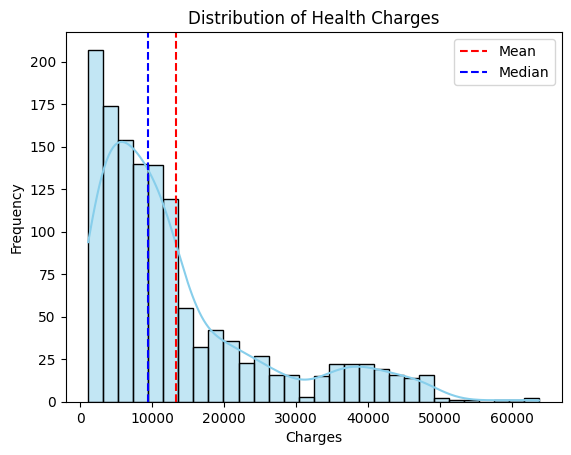

In [98]:
# Displaying the distribution of the  medical charges
sns.histplot(df['charges'], kde=True, color='skyblue', bins=30)
plt.axvline(df['charges'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['charges'].median(), color='blue', linestyle='--', label='Median')
plt.title('Distribution of Health Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we can see, the healthcare charges are skewed right. This means that most individuals have relatively low medical costs, while only a few number of indivudials have very high medical costs.


###Group Statistics for Smokers vs. Non-Smokers

The code first separates the dataset into two groups: smokers and non-smokers. It then prints summary statistics (mean, median, quartiles, min/max) for insurance charges in each group. This allows us to quantify the differences and better understand the effect smoking has on healthcare costs.

Statistics for charges of non smokers:
count     1063.000000
mean      8440.660307
std       5992.973800
min       1121.873900
25%       3988.883500
50%       7345.726600
75%      11363.019100
max      36910.608030
Name: charges, dtype: float64

Statistics for charges of smokers:
count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64


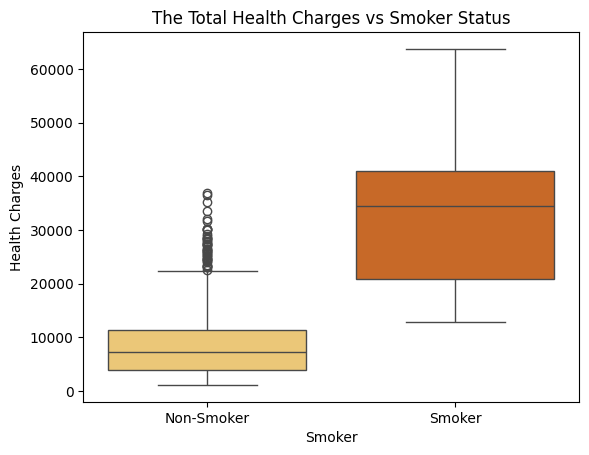

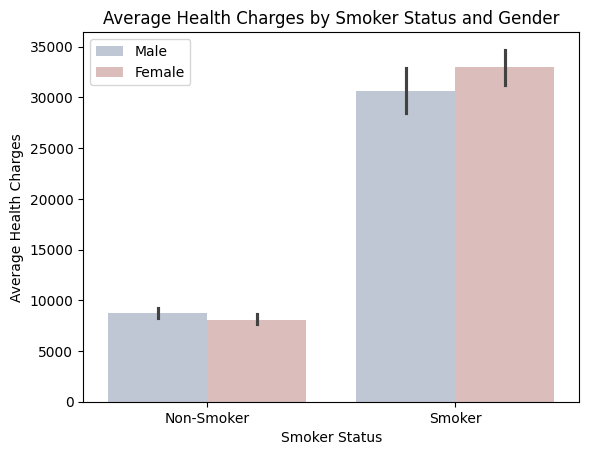

In [99]:
# Statistics for smokers vs non smokers
non_smoker_df = df.groupby('Smoker').get_group(0)
smoker_df = df.groupby('Smoker').get_group(1)

print("Statistics for charges of non smokers:")
print(non_smoker_df['charges'].describe())
print("\nStatistics for charges of smokers:")
print(smoker_df['charges'].describe())

# Plotting a boxplot to see the realation between smoking status and total health charges
sns.boxplot(x='Smoker', y='charges', hue='Smoker', data=df, palette='YlOrBr', legend=False)
plt.title("The Total Health Charges vs Smoker Status")
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.xlabel("Smoker")
plt.ylabel("Health Charges")
plt.show()

# Plotting the average charges between smokers and non smokers including gender
plot = sns.barplot(x='Smoker', y='charges', hue='sex',data=df, palette='vlag')
plt.title("Average Health Charges by Smoker Status and Gender")
plt.xlabel("Smoker Status")
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.ylabel("Average Health Charges")
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['Male','Female'])

plt.show()

###Gender-Based Analysis of Insurance Charges

 We examine whether gender influences medical insurance charges. The dataset is divided into male and female groups, and summary statistics are compared. A boxplot visualization shows that while males have slightly higher average charges, the overall distributions are quite similar. This suggests that gender may not be a major standalone factor in predicting charges, but it could still play a supporting role when combined with other variables.










Statistics for charges to Females:
count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

Statistics for charges to Males:
count      675.000000
mean     13974.998864
std      12971.958663
min       1121.873900
25%       4654.022675
50%       9377.904700
75%      19006.685500
max      62592.873090
Name: charges, dtype: float64


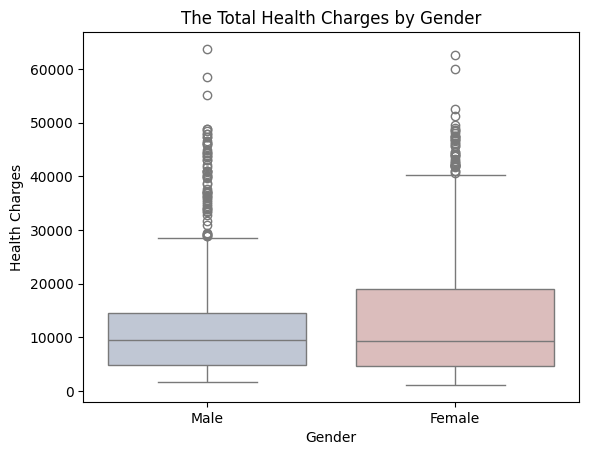

In [100]:
# Filtering the data by male and female
females_df = df.groupby('sex').get_group(0)
males_df = df.groupby('sex').get_group(1)

# Displaying the statistics for gender vs charges
print("Statistics for charges to Females:")
print(females_df['charges'].describe())
print("\nStatistics for charges to Males:")
print(males_df['charges'].describe())

# Showing Health Charges for Males vs Females
sns.boxplot(x='sex', y='charges', hue='sex', data=df, palette='vlag', legend=False)
plt.title("The Total Health Charges by Gender")
plt.xticks(ticks=[0, 1], labels=['Male','Female'])
plt.xlabel("Gender")
plt.ylabel("Health Charges")
plt.show()


###Gender-Based BMI Comparison

We compare the Body Mass Index (BMI) between males and females. Summary statistics reveal that the average BMI is quite similar across genders, with males having a slightly higher mean. A boxplot is used to visualize the distribution, which also confirms minimal difference. This suggests that gender does not significantly influence BMI in this dataset, and both groups show similar patterns in terms of weight relative to height.









Statistics for BMI of Females:
count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

Statistics for BMI of Males:
count    675.000000
mean      30.943652
std        6.144973
min       15.960000
25%       26.410000
50%       30.690000
75%       35.025000
max       53.130000
Name: bmi, dtype: float64


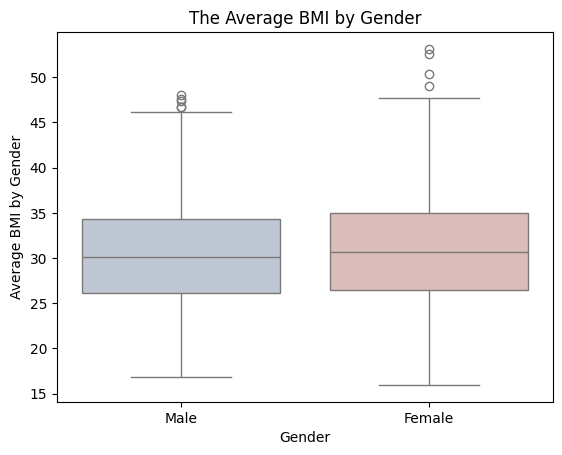

In [101]:
# Displaying Males vs Female BMI and BMI Levels
print("Statistics for BMI of Females:")
print(females_df['bmi'].describe())
print("\nStatistics for BMI of Males:")
print(males_df['bmi'].describe())

# Displaying the Average BMI between Male and Females
sns.boxplot(x='sex', y='bmi',  hue='sex', data=df, palette='vlag', legend=False)
plt.title("The Average BMI by Gender")
plt.xlabel("Gender")
plt.xticks(ticks=[0, 1], labels=['Male','Female'])
plt.ylabel("Average BMI by Gender")
plt.show()

###BMI Level Distribution by Gender

We analyze the distribution of BMI categories (underweight, normal weight, overweight, obese) for males and females. Using value_counts() and a count plot, we observe that both genders have the majority of individuals falling in the obese and overweight categories. The proportions are fairly similar across genders, indicating that BMI level distributions are consistent between males and females in this dataset. This further supports the finding that gender may not be a dominant factor in BMI-related differences.










Statistics for BMI Levels of Females:
bmi_level
Obese category    334
Overweight        197
Normal weight     118
Underweight        13
Name: count, dtype: int64

Statistics for BMI Levels of Males:
bmi_level
Obese category    370
Overweight        189
Normal weight     108
Underweight         8
Name: count, dtype: int64


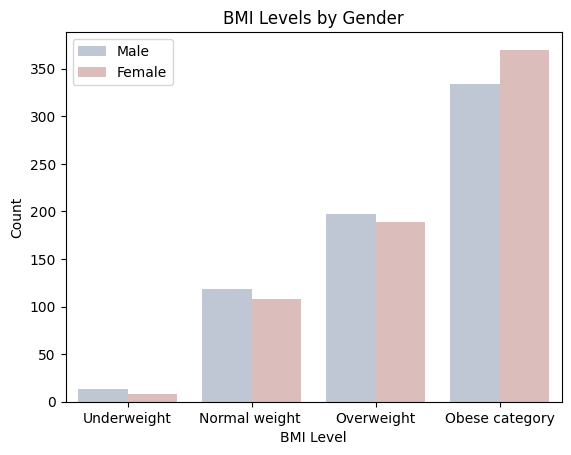

In [102]:
# Displaying BMI Levels between Males and Females
print("\nStatistics for BMI Levels of Females:")
print(females_df['bmi_level'].value_counts())
print("\nStatistics for BMI Levels of Males:")
print(males_df['bmi_level'].value_counts())

# Displaying BMI Level information by Gender
plot = sns.countplot(x='bmi_level', hue='sex', data=df, palette='vlag')
plt.title("BMI Levels by Gender")
plt.xlabel("BMI Level")
plt.ylabel("Count")

handles, labels = plot.get_legend_handles_labels()
plot.legend(handles, ['Male','Female'])

plt.show()

###Average Health Charges by BMI Category

We compare the average insurance charges across different BMI levels. The results show a clear upward trend: individuals in the obese category face the highest average medical costs, followed by those who are overweight. This suggests a positive relationship between BMI level and healthcare expenses, reinforcing the role of BMI as an important factor in predicting insurance charges.










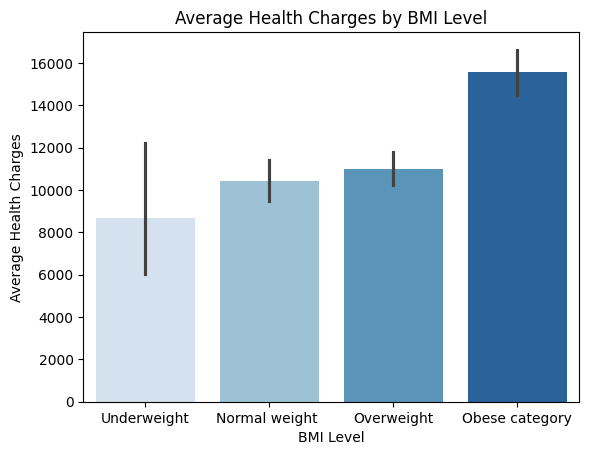

In [103]:
# Health care charges statistics based on the BMI Level
sns.barplot(x='bmi_level', y='charges', hue='bmi_level', data=df, palette='Blues')
plt.title("Average Health Charges by BMI Level")
plt.xlabel("BMI Level")
plt.ylabel("Average Health Charges")
plt.show()

###Age-Based Analysis of Insurance Charges

We explore how age influences insurance charges. Summary statistics show the distribution of ages in the dataset, followed by a bar plot that reveals a clear upward trend in average charges as age increases. Older individuals generally incur higher medical costs. Additionally, a boxplot of age across BMI categories shows that individuals in higher BMI levels tend to be older on average, suggesting possible interaction effects between age, weight, and healthcare expenses.

Statistics for Age:
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


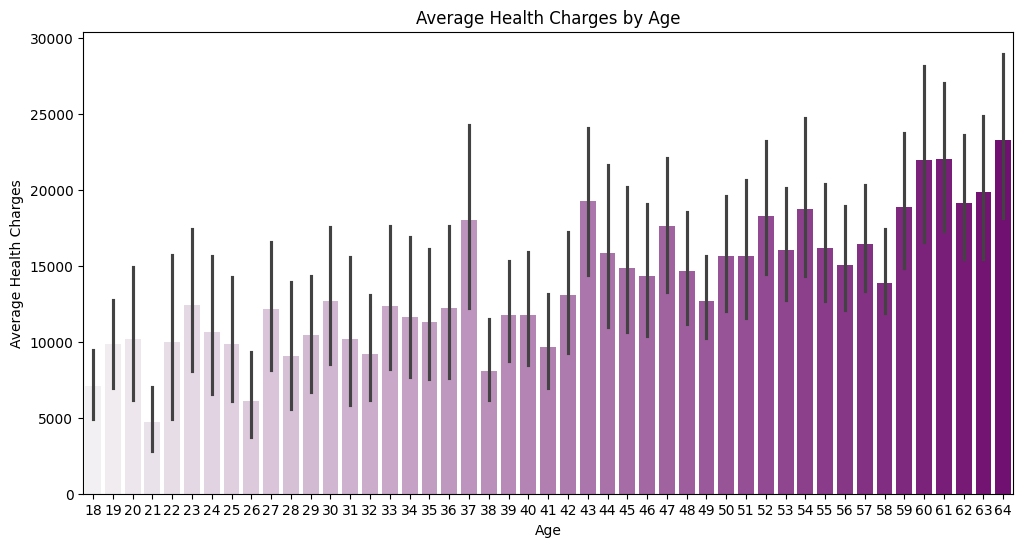

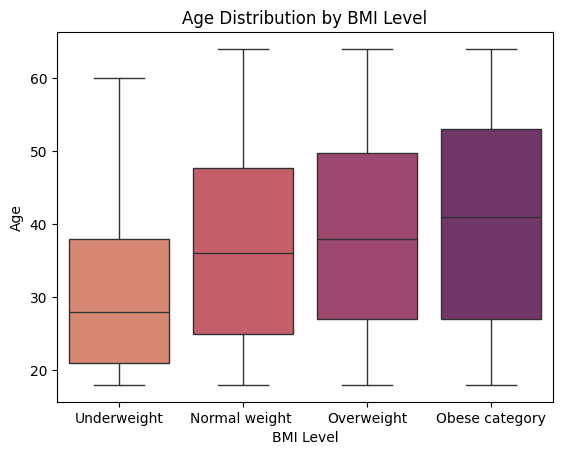

In [104]:
# Dsiplay Age stastics
print("Statistics for Age:")
print(df['age'].describe())

# Dsiplay age with Charges
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges',  hue='age', data=df, palette='light:purple', legend=False)
plt.title("Average Health Charges by Age")
plt.xlabel("Age")
plt.ylabel("Average Health Charges")
plt.show()

# Display age and BMI levels
sns.boxplot(x= 'bmi_level', y='age', hue='bmi_level', data=df, palette='flare')
plt.title("Age Distribution by BMI Level")
plt.xlabel("BMI Level")
plt.ylabel("Age")
plt.show()




# Hypotheisis Tests

Hypothesis testing is a statistical principle that is employed to determine if there is enough evidence in a sample of data to make a conclusion that a certain condition holds for the population as a whole. It is a formal procedure to test assumptions or beliefs — hypotheses — about a dataset. Hypothesis testing basically involves two contradictory statements:



Null Hypothesis (H0): This is the null hypothesis that there is no difference or no effect between groups or variables.



Alternative Hypothesis (H1): This is what we aim to establish, which states that there is a significant difference or effect.



With sample data, we compute a test statistic and compare it to a theoretical distribution in an attempt to determine a p-value — the probability of observing the data (or something more extreme) assuming that the null hypothesis is true. A low p-value (typically below 0.05) suggests that the observed effect would be surprising under the null hypothesis and therefore reject H0. A large p-value means we fail to reject H0, i.e., we lack sufficient evidence for the alternative.

Additional Info:

https://www.geeksforgeeks.org/t-test/

https://www.geeksforgeeks.org/one-way-anova/


**Null Hypothesis:** The smoker status does not affect the medical charges of the people.

**Alternative Hypothesis:** The smoker status affects the medical charges of the people.



In [105]:
# Hypothesis test two-sample t-test to check the relation between smoker status and medical charges
smoker = df[df['Smoker'] == 1]['charges']
non_smoker = df[df['Smoker'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(smoker, non_smoker)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 46.64479459840305
P-value: 1.4067220949376498e-282


Since the p-value is < 0.05 we reject the null hypothesis and thus we conclude smoker status affects the medical charges of the people

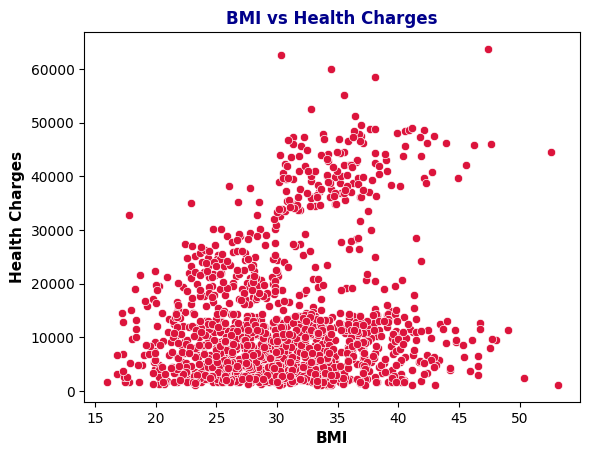

In [106]:
# Plotting a scatterplot to see the realation between bmi and total health charges
sns.scatterplot(x='bmi', y='charges', data=df, color='crimson')
plt.title('BMI vs Health Charges', color='darkblue', fontweight='bold')
plt.xlabel('BMI', fontsize=11, fontweight='bold')
plt.ylabel('Health Charges', fontsize=11, fontweight='bold')
plt.show()

In [107]:
# Correlation test to check the relation between region and medical charges
correlation = df['bmi'].corr(df['charges'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.19840083122624938


Since the Correlation coefficient is 0.19 (it is closer to 0), we can coclude that there is no significant relationship between BMI and health charges.

**Null Hypothesis:** The number of children has no effect on the medical charges.

**Alternative Hypothesis:** The number of children affects the medical charges.

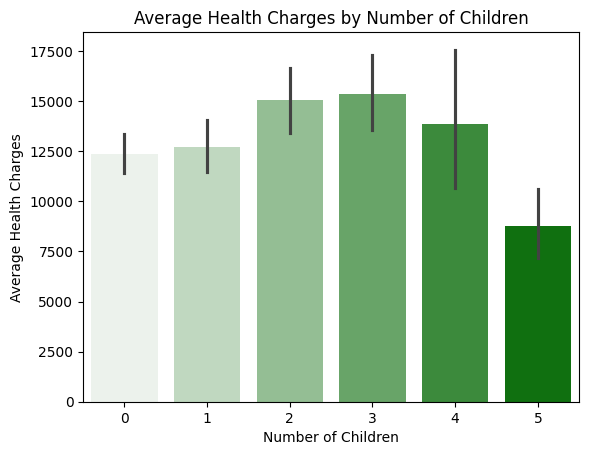

In [108]:
# average charge by number of children
sns.barplot(x='children', y='charges', hue='children', data=df, palette='light:green', legend=False)
plt.title("Average Health Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Health Charges")
plt.show()

In [109]:
groups = [df[df['children'] == n]['charges'] for n in df['children'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

F-statistic: 3.2687, p-value: 0.0061


Since the p-vlaue is < 0.05, we will reject the null hypotehsis, meaning that there is a significant difference in the medical charges across number of children.

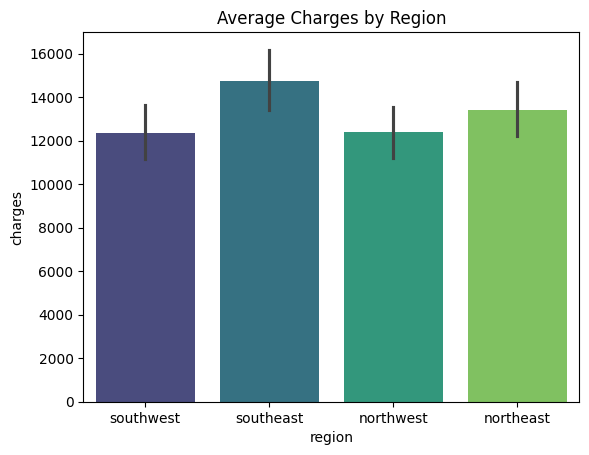

In [110]:
# Plotting a barplot to see the realation between regions and total health charges
sns.barplot(x='region', y='charges', hue ='region', data=pd.read_csv("insurance.csv"), palette="viridis")
plt.title("Average Charges by Region")
plt.show()

**Null Hypothesis:** The regions do not affect the medical charges of the people.

**Alternative Hypothesis:** The regions affect the medical charges of the people.

In [111]:
# Hypothesis test anova to check the relation between region and medical charges
f_stat, p_val= f_oneway(
    df['charges'][df['region_northeast'] == 1],
    df['charges'][df['region_northwest'] == 1],
    df['charges'][df['region_southeast'] == 1],
    df['charges'][df['region_southwest'] == 1]
)
print("P-value:", p_val)

P-value: 0.03276288025444947


Since the p-value is < 0.05 we reject the null hypothesis and thus we conclude region affects the medical charges of the people

#Machine Learning


# Random Forest Regression

Random Forest Regression is used to predict an individual's medical insurance costs based on a list of input features such as age, BMI, number of children, smoking status, sex, and region. These features are likely to interact in complex, non-linear ways, and therefore Random Forest is a good choice since it can handle such interactions without any explicit transformations or assumptions.



The data is split first into the training set and test set with a 80:20 split. The model is trained once with 100 trees (n_estimators=100) to learn from the training set. On being trained, the model is predicted on the test set. To estimate its performance, two metrics are utilized: Root Mean Squared Error (RMSE) and R2 Score. The RMSE gives a measure of the average prediction error, while the R2 Score measures how well the model is modeling the variance in the target variable. An R2 of about 0.88, as achieved here, indicates that the model is capturing most of the trends in the data.



Random Forest Regression is the ideal solution for this healthcare pricing problem in general, as it can handle mixed data types, has overfitting resistance, and can be interpreted via feature importance measures.

Additional resources: https://towardsdatascience.com/random-forest-regression-5f605132d19d/








In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setting up features and targets for all features regression
X = df.drop(columns=['charges', 'bmi_level'], axis = 1)
y = df['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [113]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 4628.622065801953
R2 Score: 0.8834098763497842


The Random Forest Regression model performed exceptionally well in predicting insurance charges, achieving a high R^2 score of 0.88. This indicates that the model is capable of explaining 88% of the variance in the target variable, making it a strong and reliable predictor.

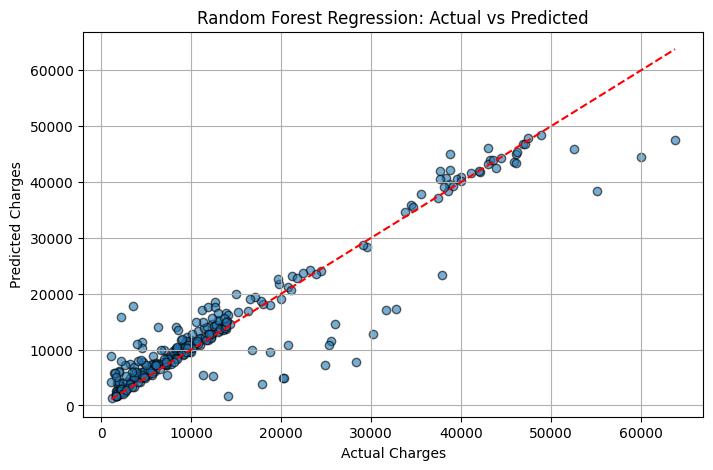

In [114]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

This scatter plot compares the actual insurance charges with the predicted charges generated by the Random Forest model. Each point represents a data sample from the test set. The red dashed line represents the ideal case where predicted values perfectly match actual values (i.e., y = x).

The plot shows that most predictions fall closely along the diagonal line, indicating strong alignment between predicted and actual charges. While a few outliers exist, particularly at higher charge values, the model overall demonstrates high predictive accuracy, visually supporting the earlier reported R² score of 0.88. This confirms that the model generalizes well and captures the key patterns in the data effectively.









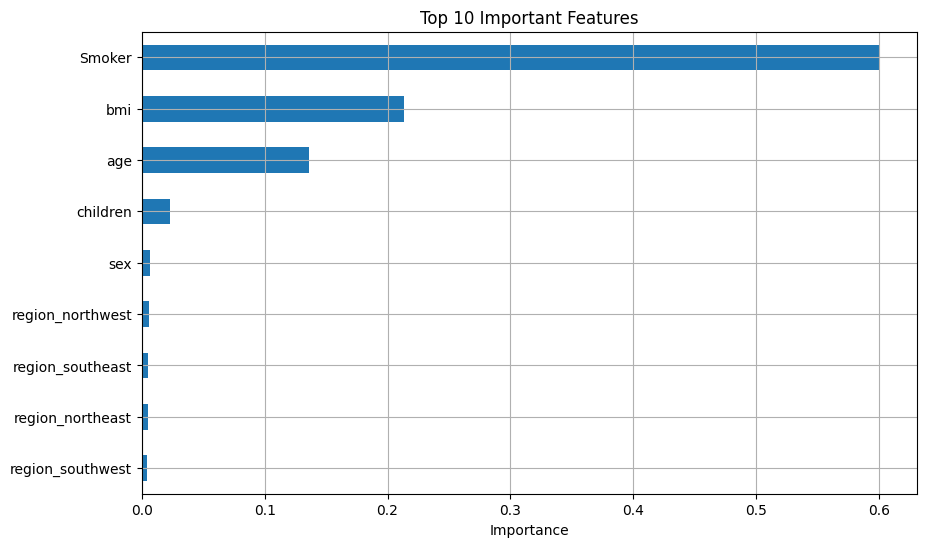

In [115]:
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importance.head(10).plot(kind='barh')
plt.xlabel("Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

The feature importance analysis reveals that smoking status is by far the most influential factor affecting insurance charges, followed by BMI and age. These findings are consistent with known real-world medical cost drivers, further validating the model’s interpretability. Other variables such as region, sex, and number of children showed relatively low impact on the prediction.

#Linear Regression Model

Linear Regression is a simpler machine learning algorithm used to make continuous predictions. It accomplishes this by determining the most fitting straight line (or hyperplane in higher dimensions) through the data that describes the relationship between the input variables and the target variable. The model assumes linearity, i.e., variations in the input variables cause proportional variations in the output.



Here in this project, we employ Linear Regression for predicting insurance cost based on age, BMI, smoker, and region features. Though it may not capture complex, non-linear patterns as well as a Random Forest would, Linear Regression provides us with a nice, easy-to-understand baseline. It allows us to get a glimpse at how much each feature contributes to the prediction via learned coefficients.



This model is especially useful in giving quick insight into the magnitude and direction of correlation between variables and healthcare spending, though its discriminative power overall is low compared to more advanced models.

Additional resources: https://www.ibm.com/think/topics/linear-regression

###Linear Regression on all features

By performing linear regression all the features, we aim to see the interaction and effects of each features, and get an accurate estimate of each feature's contribution to the medical insurance charges. This will allows use to see the complex relationships between the features and the medical insurance charges.

In [116]:
# Linear Regression on all the features code
from sklearn.model_selection import train_test_split

# setting up features and targets for all features regression
X = df.drop(columns=['charges', 'bmi_level'], axis = 1)
y = df['charges']


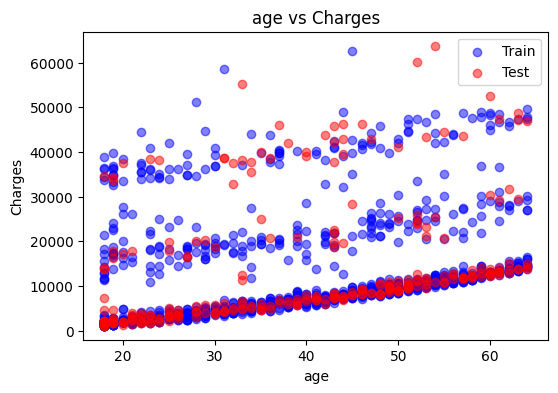

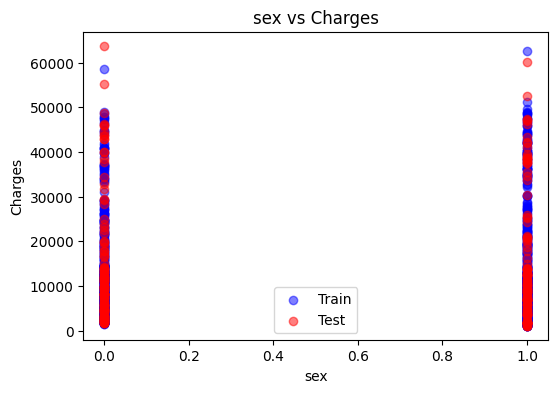

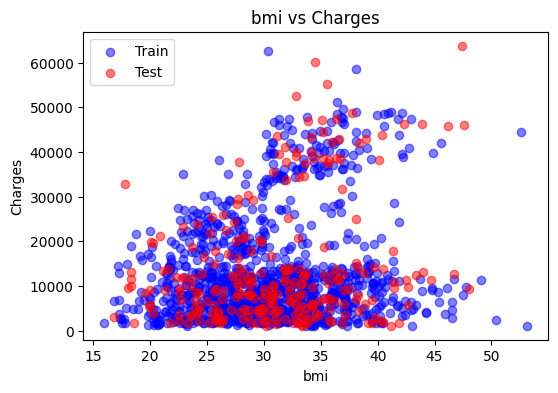

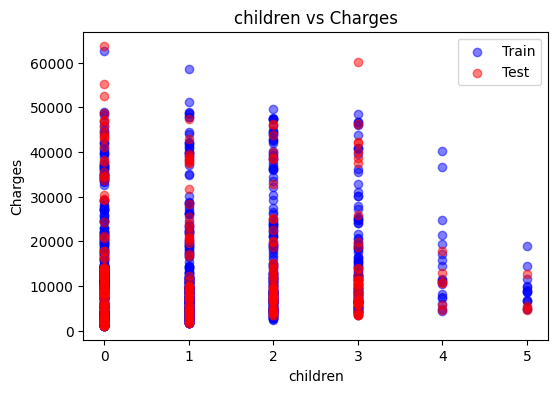

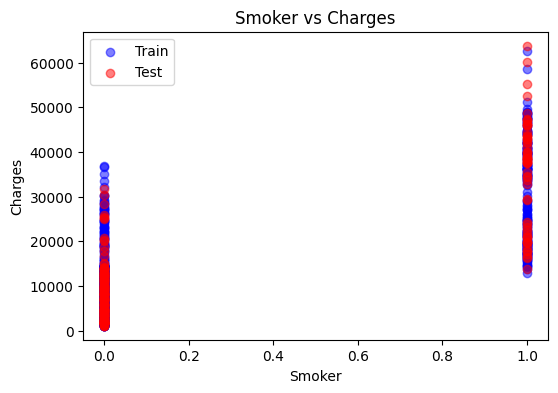

In [117]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plotting the training and testing datasets with numeric values
def draw_all_scatters(X_train, y_train, X_test, y_test):
  numeric_cols = X_train.select_dtypes(include=[np.number]).columns
  for col in numeric_cols:
      plt.figure(figsize=(6, 4))
      plt.scatter(X_train[col], y_train, color='blue', label='Train', alpha=0.5)
      plt.scatter(X_test[col], y_test, color='red', label='Test', alpha=0.5)
      plt.title(f'{col} vs Charges')
      plt.xlabel(col)
      plt.ylabel('Charges')
      plt.legend()
      plt.show()

draw_all_scatters(X_train, y_train, X_test, y_test)

In [118]:
# Setting up the linear regression
from sklearn.linear_model import LinearRegression

# function to fit the model
def fit_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

#Function to predict using the fitted model
def predict_data(model, X_train, X_test):
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)
  return Y_train_pred, Y_test_pred


# Fitting the model for each dataset and predicting
model = fit_model(X_train, y_train)
Y_train_pred, Y_test_pred = predict_data(model, X_train, X_test)



In [119]:
from sklearn.metrics import r2_score, mean_squared_error

# Function to calculate MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    return mse_train, mse_test, r2_train, r2_test


mse_train, mse_test, r2_train, r2_test = evaluate_model(y_train, Y_train_pred, y_test, Y_test_pred)

# calculating the RMSE (squre root of MSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"MSE Train: {mse_train:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")
print(f"R^2 Train: {r2_train:.4f}")
print(f"R^2 Test: {r2_test:.4f}")


MSE Train: 36979860.9047
MSE Test: 35478020.6752
RMSE Train: 6081.1069
RMSE Test: 5956.3429
R^2 Train: 0.7299
R^2 Test: 0.8069


In [120]:
# Adding the charge values for comparison
print(df['charges'].min())
print(df['charges'].max())


1121.8739
63770.42801


####Analysis of Linear Regression on all the Features
The MSE, RMSE, and R^2 values help us understand many things about the performance of our model.

The Root Mean Squared Error is about 5,990 and 6,024 for the train and test datasets. This means that the models predictions on average are off by arond \$6,000. As our charge values range from about \$1,112 to \$63,770, being off by about \$6,000 is moderate.

Looking at the R^2, or the Coefficient of Determination, we have the values of 0.738 and 0.803 from our test and training sets. This tells us that the model explains about 74\% of variance on the trainng data, and 80\% of the variance on the test data. This shows that the models generalizes well and doenst overfit the data. Since R^2 is is higher on the test set than the train, this shows that the model has good generalization.



###Linear Regression on each individual Feature

By performing linear regression on each feature individually, we can analyze the effects of each feature by itself, ignoring all other variables. This method of linear regression will not account for any correlations between the features. Through this menthod we will get to see each individual features effect on the medical insurance charges.

In [121]:
feature_list = X_train.columns

In [122]:
# Function for fitting and predicting
def fit_and_predict_per_feature(X_train, X_test, y_train, feature):
    model = LinearRegression()
    X_train_feature = X_train[[feature]]  # Keep as DataFrame
    X_test_feature = X_test[[feature]]
    model.fit(X_train_feature, y_train)
    y_train_pred = model.predict(X_train_feature)
    y_test_pred = model.predict(X_test_feature)
    return model, y_train_pred, y_test_pred


In [123]:
# function to plot the regression plot
def plot_regression(feature, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred):
    plt.figure(figsize=(8,5))
    plt.scatter(X_train[feature], y_train, color='blue', label='Train', alpha=0.6)
    plt.scatter(X_test[feature], y_test, color='orange', label='Test', alpha=0.6)

    # Combine for regression line
    X_all = np.concatenate([X_train[feature], X_test[feature]])
    y_all_pred = np.concatenate([y_train_pred, y_test_pred])
    sorted_idx = np.argsort(X_all)

    plt.plot(X_all[sorted_idx], y_all_pred[sorted_idx], color='green', label='Regression Line')

    plt.title(f'Regression Plot: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [124]:
# Function to get the metrics for each model
def evaluate_per_feature(y_train, y_train_pred, y_test, y_test_pred, feature):
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print(f"\nMetrics for feature: {feature}")
    print(f"  MSE Train: {mse_train:.4f}")
    print(f"  MSE Test: {mse_test:.4f}")
    print(f"  RMSE Train: {rmse_train:.4f}")
    print(f"  RMSE Test: {rmse_test:.4f}")
    print(f"  R^2 Train: {r2_train:.4f}")
    print(f"  R^2 Test: {r2_test:.4f}")

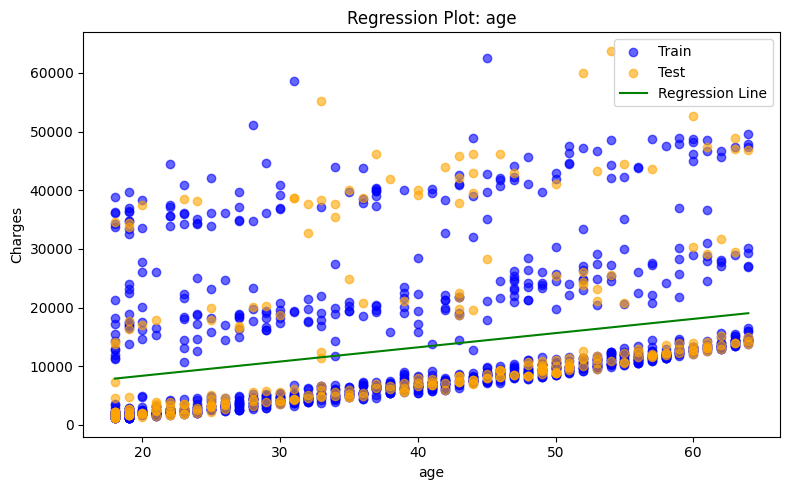


Metrics for feature: age
  MSE Train: 125424692.5016
  MSE Test: 166275348.2318
  RMSE Train: 11199.3166
  RMSE Test: 12894.7799
  R^2 Train: 0.0839
  R^2 Test: 0.0951


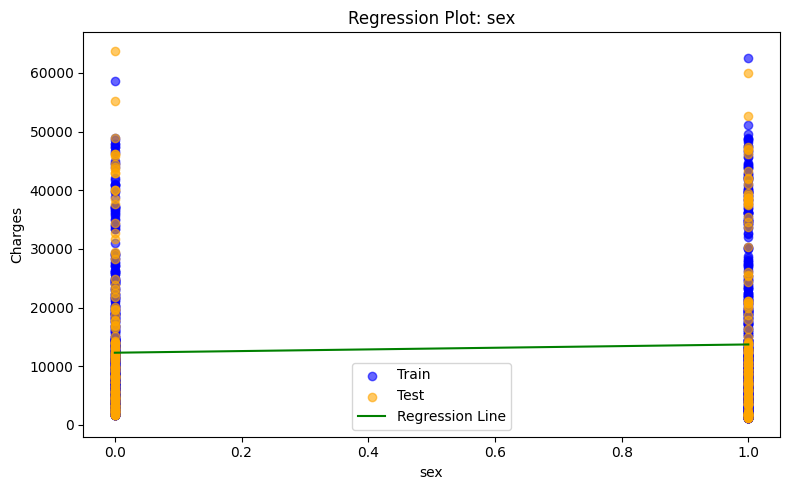


Metrics for feature: sex
  MSE Train: 136419033.5809
  MSE Test: 184846543.5473
  RMSE Train: 11679.8559
  RMSE Test: 13595.8282
  R^2 Train: 0.0036
  R^2 Test: -0.0059


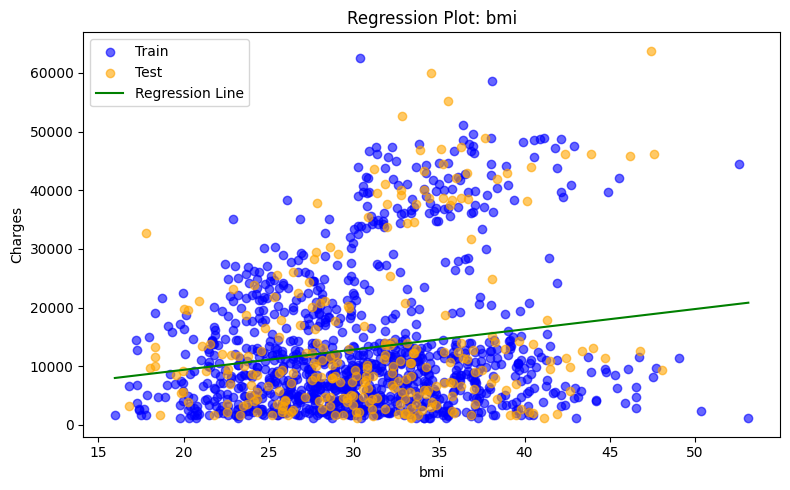


Metrics for feature: bmi
  MSE Train: 132555195.2823
  MSE Test: 174251720.5220
  RMSE Train: 11513.2617
  RMSE Test: 13200.4440
  R^2 Train: 0.0318
  R^2 Test: 0.0517


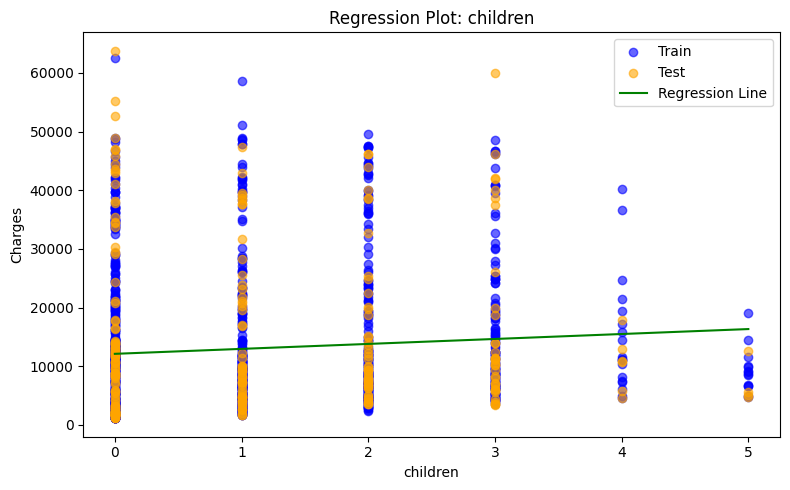


Metrics for feature: children
  MSE Train: 135898004.5085
  MSE Test: 186212505.6387
  RMSE Train: 11657.5299
  RMSE Test: 13645.9703
  R^2 Train: 0.0074
  R^2 Test: -0.0134


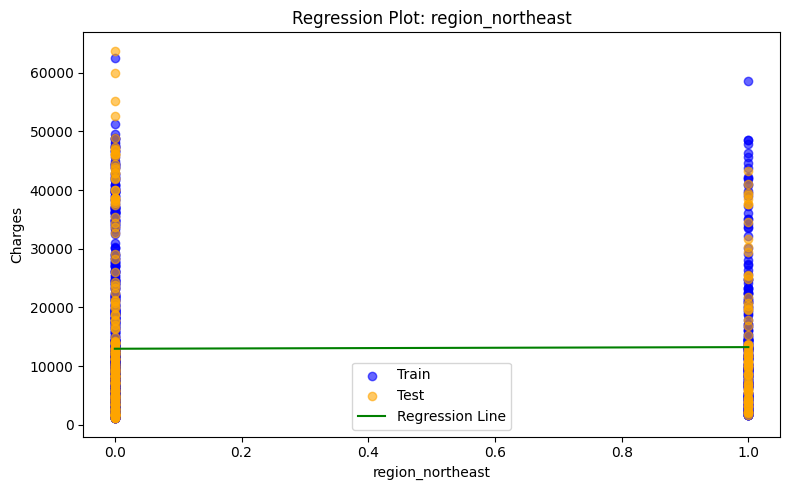


Metrics for feature: region_northeast
  MSE Train: 136900873.5529
  MSE Test: 185334215.5412
  RMSE Train: 11700.4647
  RMSE Test: 13613.7510
  R^2 Train: 0.0001
  R^2 Test: -0.0086


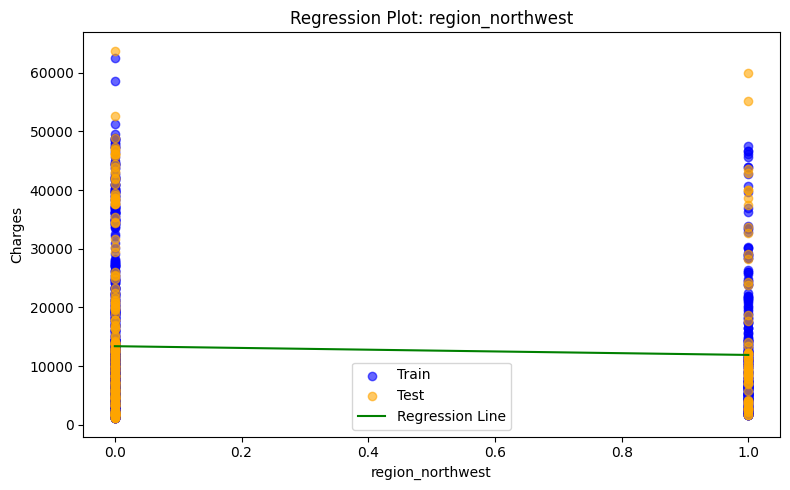


Metrics for feature: region_northwest
  MSE Train: 136501183.0141
  MSE Test: 185980914.6392
  RMSE Train: 11683.3721
  RMSE Test: 13637.4820
  R^2 Train: 0.0030
  R^2 Test: -0.0121


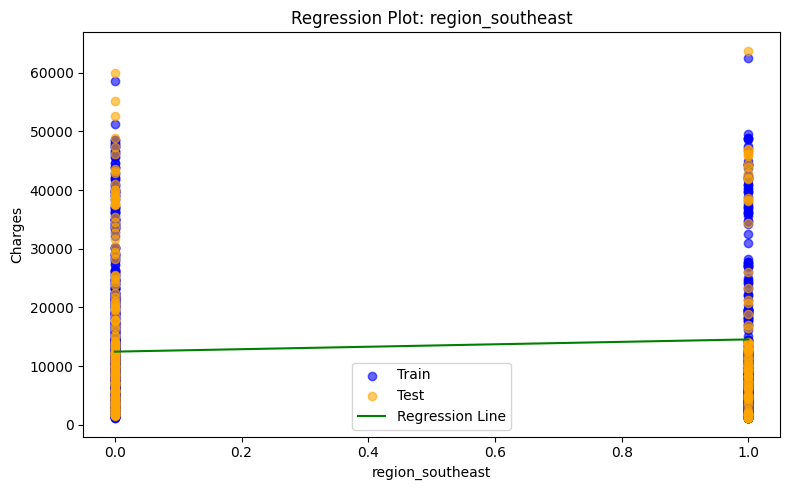


Metrics for feature: region_southeast
  MSE Train: 136061753.3439
  MSE Test: 184729765.9991
  RMSE Train: 11664.5511
  RMSE Test: 13591.5329
  R^2 Train: 0.0062
  R^2 Test: -0.0053


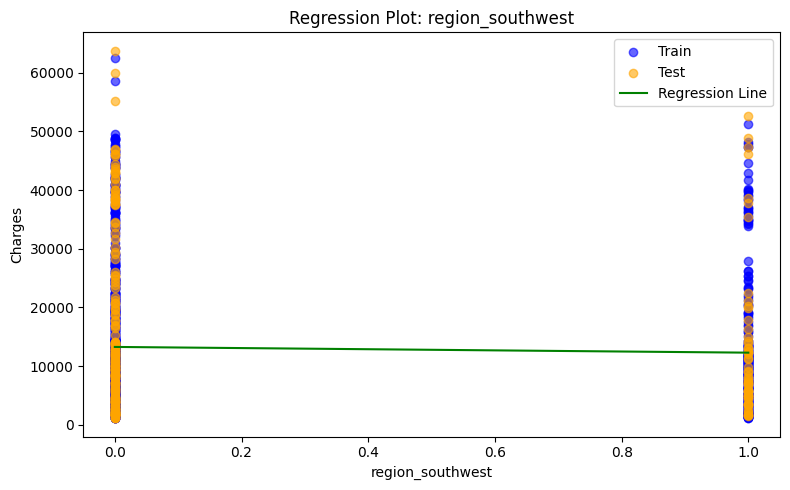


Metrics for feature: region_southwest
  MSE Train: 136737199.1314
  MSE Test: 184662394.3662
  RMSE Train: 11693.4682
  RMSE Test: 13589.0542
  R^2 Train: 0.0013
  R^2 Test: -0.0049


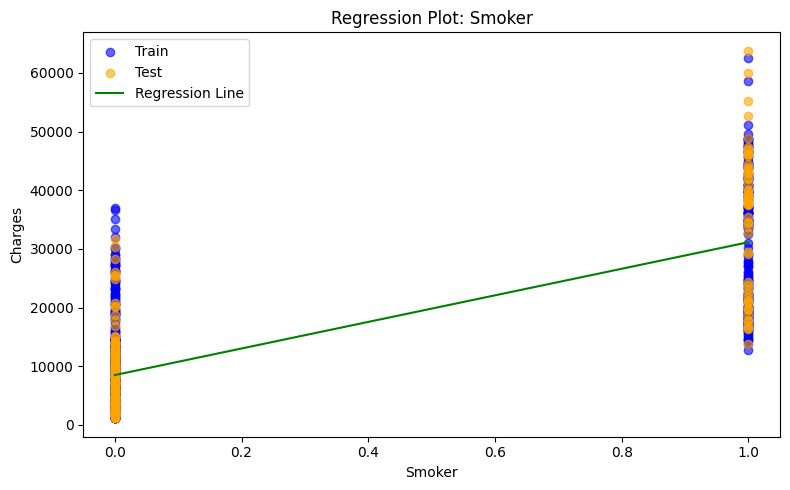


Metrics for feature: Smoker
  MSE Train: 54864526.3667
  MSE Test: 60039304.1501
  RMSE Train: 7407.0592
  RMSE Test: 7748.5033
  R^2 Train: 0.5993
  R^2 Test: 0.6733


In [125]:
# Getting data for each feature
for feature in feature_list:
    model, y_train_pred, y_test_pred = fit_and_predict_per_feature(X_train, X_test, y_train, feature)
    plot_regression(feature, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)
    evaluate_per_feature(y_train, y_train_pred, y_test, y_test_pred, feature)


####Analysis on Linear Regression for each feature

Based on the linear regression performed on each feature, let's analyze the model's metrics.

**Age**:

Age is somewhat useful, but very weak on its own, meaning that it likely does not have much effect on the medical charges on its own, but combined with other factors, it could have an effect. The MSE and RMSE show that medical charge values are off by roughly \$11,000 to \$12,900, which is a very large error scale. With the R^2 value being about 0.09, age only explains about 9\% of the variance in the medical charges. Therefore, we can say that the age of the person could have some effect on their medical charges.


**Sex:**

Sex is not predictive of the medical charges. The MSE and RMSE values show that medical charge values are off by roughly \$11,680 to \$13,600. This is also a very large error scale considering the values of the medical charges. The R^2 value shows that the training only explains 0.3\% of the variance in the data, while the testing value is negative. This means that the model is worse than simply predicting the mean. Therefore, we can say that the sex of the person is not an important factor in predicting their medical charges.

**BMI:**


BMI seems to have a relationship with the medical charges. While the MSE and RMSE are still high, with an error of predicting the charges roughly being between \$11,500 to \$13,200, it seems to predict some variance. The R^2 value tells us that BMI is able to predict about 3\% to 5\% of the variance in the medical charges. Therefore, we can conclude that a person's BMI does have some effect on predicting their medical charges.


**Children:**

The number of children does not seem to play a role in predicting the medical charges. The MSE and RMSE tell us that the medical charge values are off by \$11,650 to \$13,650, and with the R^2 being close to 0 for the training and negative for the testing. Therefore, we can say that the number of children on their insurance does not have any effect on predicting the medical charges.


**Region:**

All the regions do not seem to have any relationship with the medical charges. All of the MSE and RMSE values range from 11,660 to 13,640. The R^2 value is also really close to 0 or negative, meaning that the regions can only explain a very, very small portion of the variance, if any. Therefore, we can say that the region the person lives in does not have any effect on their medical charges.

**Smoker:**

This is the best-performing feature. Smoker status explains about 60\% to 67\% of the variance in the medical charges based on its R^2 value. Its training and testing errors are also much lower when compared to other features, at only \$7,400 to \$7,700. It also has a good generalization, with very similar testing and training performance. Therefore, we can say that from all the features, the smoking status of a person is highly predictive of their medical charges.





# Insights and Conclusions

In conclusion, through our project we were able to answer all the questions we had about our healthcare dataset. It highlighted how we can use personal and lifestyle factors such as age, BMI, number of children, smoking status, sex, and region to predict the medical charges of a person. Through our exploratory ananlysis we were able to see that smokers had high medical charges, and many of the people had a high BMI that incdicated that they were overwieght, this to contributed to higher medical charges.

The hypothesis testing (t-tests and ANOVA tests results) reinforced the fact that there was a significant difference in the medical charges of smokers and non smokers. This is true as smokers are at a higher risk of lung cancer and other diseases, so they get sick often. We also saw that people with different number of children had different medical expenses.

The machine learning analysis told us that random forest regression did a better job at predicting the charges than linear regression as random forest had an R^2 value of 0.88 compared to 0.80 R^2 of linear regression, which means that it explained the varience of the data better. The standard error in predicting charges was also better for random forest, on average the predicted value differed from the actual ones by \$4628 as compared to \$5956 for linear regression. Also linear regression using all the features to predict charges performed better than linear regression on each indivisual feature, as it captured the influence of all the personal features, leading to a more accurate prediction of the charges. Random forest regression also told us the most important that influenced medical charges were smoker, BMI, age and children, which means that people who smoke, people who are obese, people with a large number of childern and old people have the highest medical charges, which is expected. Smoking was the most important factor, this makes sense as people who don't smoke lead a relatively healthier lifestyle and are free of lung diseases, thus they have lower medical costs.

Overall, this projects highlights that personal and lifestyle features heeavily influence the medical charges of the person, and using such features we can predict the medical costs of people. This can be used by insurance companies and medical policymakers to understand what influences the medical costs.